# Timelike orbits in Schwarzschild spacetime

This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/ges_orbits.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, with the command `sage -n jupyter`

It uses the `integrated_geodesic` functionality introduced by Karim Van Aelst in **SageMath 8.1**, in the framework of the [SageManifolds](http://sagemanifolds.obspm.fr) project.

A version of SageMath at least equal to 8.1 is required to run this worksheet:

In [1]:
version()

'SageMath version 8.1, Release Date: 2017-12-07'

In [2]:
%display latex  # LaTeX rendering turned on

We define first the spacetime manifold $M$ and the standard Schwarzschild-Droste coordinates on it:

In [3]:
M = Manifold(4, 'M')
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\phi')
X

Chart (M, (t, r, th, ph))

For graphical purposes, we introduce $\mathbb{R}^3$ and some coordinate map $M\to \mathbb{R}^3$:

In [4]:
R3 = Manifold(3, 'R^3', latex_name=r'\mathbb{R}^3')
X3.<x,y,z> = R3.chart()
to_R3 = M.diff_map(R3, {(X, X3): [r*sin(th)*cos(ph), 
                                  r*sin(th)*sin(ph), r*cos(th)]})
to_R3.display()

M --> R^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

Next, we define the Schwarzschild metric:

In [5]:
g = M.lorentzian_metric('g')
m = var('m'); assume(m >= 0)
g[0,0], g[1,1] = -(1-2*m/r), 1/(1-2*m/r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

We set the specific conserved energy and angular momentum:

In [6]:
#var('E L', domain='real')
E = 0.973
L = 4.2*m

In [7]:
u = M.vector_field(name='u')
u[0] = E/(1-2*m/r)
u[1] = sqrt(E^2 - (1-2*m/r)*(1+L^2/r^2))
u[3] = L/(r^2*sin(th)^2)
u.display()

u = -0.973000000000000/(2*m/r - 1) d/dt + sqrt((17.6400000000000*m^2/r^2 + 1)*(2*m/r - 1) + 0.946729000000000) d/dr + 4.20000000000000*m/(r^2*sin(th)^2) d/dph

In [8]:
g(u,u).display()

g(u,u): M --> R
   (t, r, th, ph) |--> -(-35.28*m^3 + 17.64*m^2*r - (-35.28*m^3 + 17.64*m^2*r - 2.0*m*r^2 + 1.0*r^3)*sin(th)^2)/((2*m*r^2 - r^3)*sin(th)^2)

Pericenter and apocenter:

In [9]:
eq = (r^3*((1-2/r)*(1+L^2/m^2/r^2) - E^2)).simplify_full()
eq

0.05327100000000007*r^3 - 2.0*r^2 + 17.64*r - 35.28

In [10]:
R.<r> = RR[]
print(R)

Univariate Polynomial Ring in r over Real Field with 53 bits of precision


In [11]:
eqp = R(eq)
eqp

0.0532710000000001*r^3 - 2.00000000000000*r^2 + 17.6400000000000*r - 35.2800000000000

In [12]:
roots = sorted(eqp.real_roots())
roots

[2.85236553627370, 9.05774475732293, 25.6337691154627]

In [13]:
r_per = roots[1]*m
r_apo = roots[2]*m
r_per, r_apo

(9.05774475732293*m, 25.6337691154627*m)

We pick an initial point and an initial tangent vector:

In [14]:
r0 = r_per
p0 = M.point((0, r0, pi/2, 1e-12), name='p_0')
Tp0 = M.tangent_space(p0) 
u0 = u.at(p0)
u0.set_name('u_0')
print(u0)

Tangent vector u_0 at Point p_0 on the 4-dimensional differentiable manifold M


In [15]:
u0.display()

u_0 = 1.248725471366881 d/dt + 0.0511928294380894/m d/dph

Let us check that the scalar square of $u_0$ is $-1$, by means of the metric tensor at $p_0$:

In [16]:
g0 = g.at(p0)
print(g0)

Symmetric bilinear form  g on the Tangent space at Point p_0 on the 4-dimensional differentiable manifold M


The scalar square is indeed equal to $-1$: 

In [17]:
g0(u0,u0).simplify_full()

-0.9999999999999992

### Check

Let us compute the conserved energy and angular momentum along the geodesic by 
taking scalar products of the 4-velocity $v_0$ with the Killing vectors $\xi=\frac{\partial}{\partial t}$ and $\eta=\frac{\partial}{\partial t}$:

In [18]:
xi = X.frame()[0]
eta = X.frame()[3]
xi, eta

(Vector field d/dt on the 4-dimensional differentiable manifold M,
 Vector field d/dph on the 4-dimensional differentiable manifold M)

In [19]:
xi0 = xi.at(p0)
eta0 = eta.at(p0)
print(xi0)
print(eta0)

Tangent vector d/dt at Point p_0 on the 4-dimensional differentiable manifold M
Tangent vector d/dph at Point p_0 on the 4-dimensional differentiable manifold M


The specific conserved energy $\varepsilon$ is:

In [20]:
- g0(xi0, u0)

0.9729999999999998

while the specific conserved angular momentum $\ell$ is

In [21]:
g0(eta0, u0)

4.2*m

We declare the geodesic through $p_0$ having $v_0$ as inital vector, denoting by $s$ the affine parameter (proper time):

In [22]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 1500), u0); geod

Integrated geodesic in the 4-dimensional differentiable manifold M

We ask for the numerical integration of the geodesic, providing some numerical value for the parameter $m$, and then plot it in terms of the Cartesian chart:

In [23]:
sol = geod.solve(step=4, parameters_values={m: 1})  # numerical integration
interp = geod.interpolate()                 # interpolation of the solution for the plot

In [24]:
graph = geod.plot_integrated(chart=X3, mapping=to_R3, ambient_coords=(x,y), plot_points=500, 
                             thickness=2, label_axes=False)   

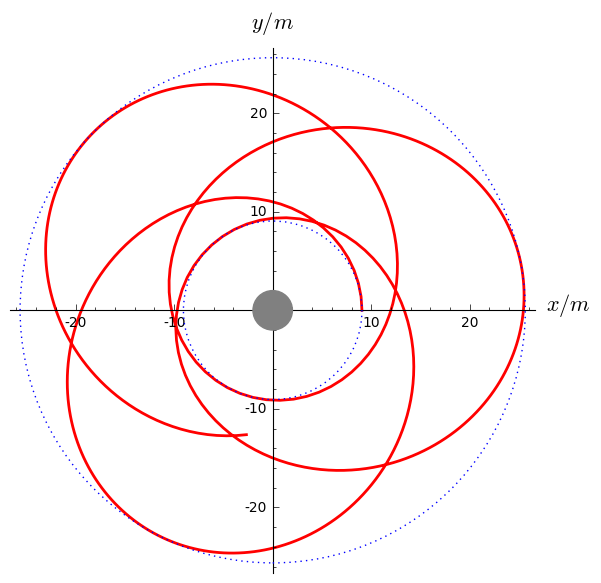

In [25]:
graph += circle((0,0), r_per/m, linestyle=':')
graph += circle((0,0), r_apo/m, linestyle=':')
graph += circle((0,0), 2, fill=True, edgecolor='grey', facecolor='grey')
show(graph, aspect_ratio=1, axes_labels=[r'$x/m$', r'$y/m$'])

In [26]:
file_name = "ges_orbit_e{:.3f}_l{:.3f}.pdf".format(float(E), float(L/m))
graph.save(file_name, aspect_ratio=1, axes_labels=[r'$x/m$', r'$y/m$'])
file_name

'ges_orbit_e0.973_l4.200.pdf'

Some details about the system solved to get the geodesic:

In [27]:
geod.system(verbose=True)

Geodesic in the 4-dimensional differentiable manifold M equipped with Lorentzian metric g on the 4-dimensional differentiable manifold M, and integrated over the Real interval (0, 1500) as a solution to the following geodesic equations, written with respect to Chart (M, (t, r, th, ph)):

Initial point: Point p_0 on the 4-dimensional differentiable manifold M with coordinates [0, 9.05774475732293*m, 1/2*pi, 1.00000000000000e-12] with respect to Chart (M, (t, r, th, ph))
Initial tangent vector: Tangent vector u_0 at Point p_0 on the 4-dimensional differentiable manifold M with components [1.248725471366881, 0, 0, 0.0511928294380894/m] with respect to Chart (M, (t, r, th, ph))

d(t)/ds = Dt
d(r)/ds = Dr
d(th)/ds = Dth
d(ph)/ds = Dph
d(Dt)/ds = 2*Dr*Dt*m/(2*m*r - r^2)
d(Dr)/ds = -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4)
d(Dth)/ds = (Dph^2*r*cos(th)*sin(th) - 2*Dr

[[2*Dr*Dt*m/(2*m*r - r^2),
  -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4),
  (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r,
  -2*(Dph*Dth*r*cos(th) + Dph*Dr*sin(th))/(r*sin(th))],
 Tangent vector u_0 at Point p_0 on the 4-dimensional differentiable manifold M,
 Chart (M, (t, r, th, ph))]

We recognize in the above list the Christoffel symbols of the metric $g$:

In [28]:
g.christoffel_symbols_display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)